In [1]:
import numpy as np
import matplotlib.pyplot as plt
def experiment(a):
    N = int(1e4); D = 2
    X = np.random.randn(N, D)
    A = np.array([[1,0],[a,1-a]])
    Z = X.dot(A.T)
    plt.plot(Z[:,0], Z[:,1], '.')
    plt.axis('square')
    plt.show()

The more corelated two variables are, the thinner the shape is.

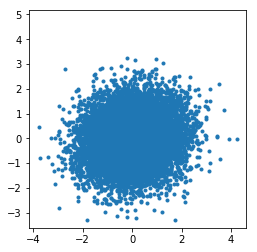

In [2]:
experiment(0.1)

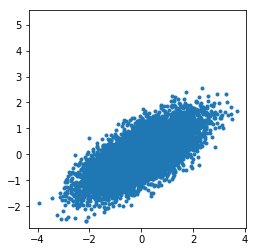

In [3]:
experiment(0.5)

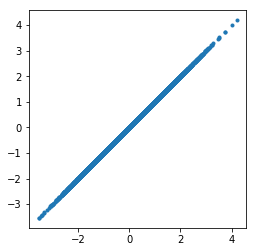

In [9]:
experiment(1)

In [5]:
def my_cov(X):
    """
    Each column of X is a whole sampled vector
    """
    return 1.0 * X.dot(X.T) / X.shape[1]

In [10]:
N = int(1e4); D = 2
X = np.random.randn(N, D)
print('my_cov:')
print(my_cov(X.T))
print('np_cov:')
print(np.cov(X.T))

my_cov:
[[ 0.99821791 -0.00342247]
 [-0.00342247  1.00892967]]
np_cov:
[[ 0.99804071 -0.00341356]
 [-0.00341356  1.00903026]]


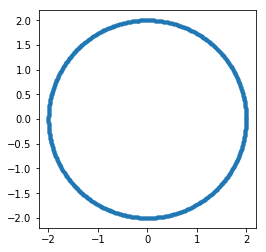

In [11]:
theta = np.arange(0, 2 * np.pi, 0.01)
x1 = 2 * np.cos(theta)
x2 = 2 * np.sin(theta)
X = np.vstack([x1,x2]).T

plt.plot(X[:,0], X[:,1], '.')
plt.axis('square')
plt.show()

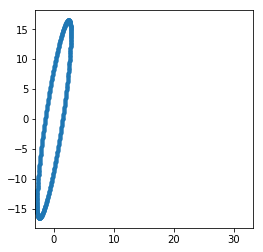

In [12]:
A = np.array([[1,8],
              [1,2]])
Y = X.dot(A)

plt.plot(Y[:,0], Y[:,1], '.')
plt.axis('square')
plt.show()

# Naive Bayes
Features are assumed to be imdependent give the class is known. 

Not all Bayes Classifiers are Naive.

$x_d \in \{0,1\}$

$$p(\mathbf{x}|y=k,\theta) = \Pi p(x_d|y=k,\theta) = \Pi \theta_{d,k}^{x_d}(1-\theta_{d,k})^{1-x_d}$$

Where $\theta_{d,k}$ gives the probability of $x_d = 1$ given y=k.

# Bayes Classifiers 

For each class k, we train a classifier using Gaussian distribustion.

$$p(\mathbf{x}|y=k) = N(\mathbf{x};\mathbf{\mu_k},\Sigma_k)$$
Then invert it.
$$p(y=k|\mathbf{x}) \propto p(\mathbf{x}|y=k)p(y=k) = N(\mathbf{x};\mathbf{\mu_k},\Sigma_k)\pi_k $$

At training time, just simply caculate mean of traning set and covariance.

$\pi_k$ is $p(y=k)$, which can be got by counting proportion of y=k in training set.

The difference between Naive Bayes and Bayes Classifiers is Naive Bayes assume that every features are independent, but Bayes Classifiers are not.

# Check understanding

Sketch a dataset with binary labels where a Gaussian Bayes classifier would work well, but a Gaussian Naive Bayes classifier would not.

Answer: Use $\begin{bmatrix}
1 & 1-a\\
a & 0
\end{bmatrix}\mathbf{x}$ as dataset. Because every features are dependent, Naive Bayes can't do well in this dataset.

In [13]:
class gaussian_bayes_classifier(object):
    def train(X, y_):
        A = np.vstack([X.T,y_]).T
        boolean1 = (A[:,-1] == 1)
        boolean0 = (A[:,-1] == 0)
        X1 = A[boolean]
        # TODO

SyntaxError: unexpected EOF while parsing (<ipython-input-13-8013b5b32b38>, line 3)

In [16]:
X = np.array([[1,2],[3,4]])
y = np.array([1,2])
np.vstack([X.T,y]).T

array([[1, 2, 1],
       [3, 4, 2]])

In [20]:
a = (X[:,-1] <= 5)
X[a]

array([[1, 2],
       [3, 4]])